In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
co2 = np.loadtxt('C:\\Users\\brije\\Downloads\\CO2_R.txt',skiprows=1)

In [3]:
co2

array([[1959.  ,  315.42,  316.31,  316.5 ,  317.56,  318.13,  318.  ,
         316.39,  314.65,  313.68,  313.18,  314.66,  315.43],
       [1960.  ,  316.27,  316.81,  317.42,  318.87,  319.87,  319.43,
         318.01,  315.74,  314.  ,  313.68,  314.84,  316.03],
       [1961.  ,  316.73,  317.54,  318.38,  319.31,  320.42,  319.61,
         318.42,  316.63,  314.83,  315.16,  315.94,  316.85],
       [1962.  ,  317.78,  318.4 ,  319.53,  320.42,  320.85,  320.45,
         319.45,  317.25,  316.11,  315.27,  316.53,  317.53],
       [1963.  ,  318.58,  318.92,  319.7 ,  321.22,  322.08,  321.31,
         319.58,  317.61,  316.05,  315.83,  316.91,  318.2 ],
       [1964.  ,  319.41,  320.07,  320.74,  321.4 ,  322.06,  321.73,
         320.27,  318.54,  316.54,  316.71,  317.53,  318.55],
       [1965.  ,  319.27,  320.28,  320.73,  321.97,  322.  ,  321.71,
         321.05,  318.71,  317.66,  317.14,  318.7 ,  319.25],
       [1966.  ,  320.46,  321.43,  322.23,  323.54,  323.91, 

### Plot monthly variation of CO2 for all years

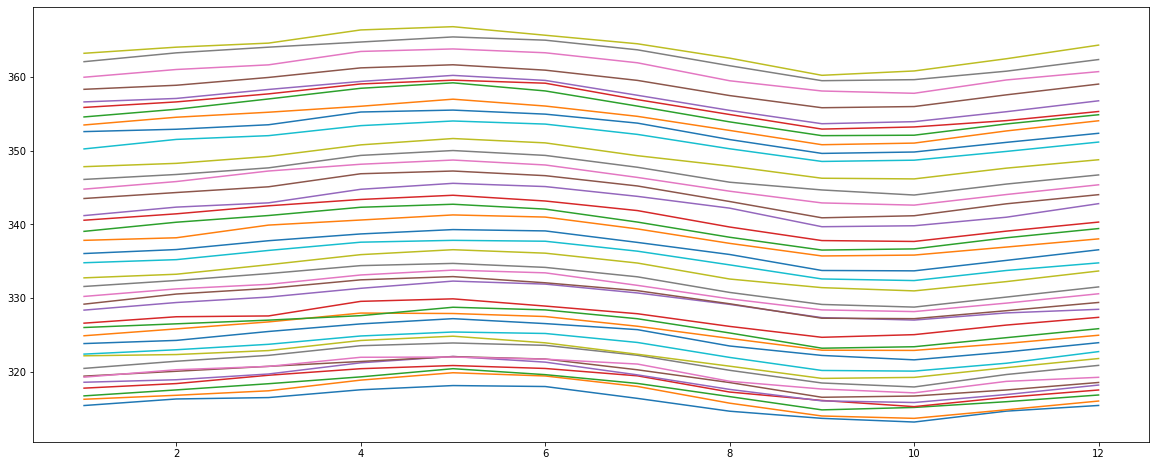

In [17]:
plt.figure(figsize=(20,8))
months = [1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(0,co2.shape[0]):
    plt.plot(months[:],co2[i,1:])

### Plot the yearly variation of CO2 for each month

In [5]:
co2[:,1]

array([315.42, 316.27, 316.73, 317.78, 318.58, 319.41, 319.27, 320.46,
       322.17, 322.4 , 323.83, 324.89, 326.01, 326.6 , 328.37, 329.18,
       330.23, 331.58, 332.75, 334.8 , 336.05, 337.84, 339.06, 340.57,
       341.2 , 343.52, 344.79, 346.11, 347.84, 350.25, 352.6 , 353.5 ,
       354.59, 355.88, 356.63, 358.34, 359.98, 362.09, 363.23])

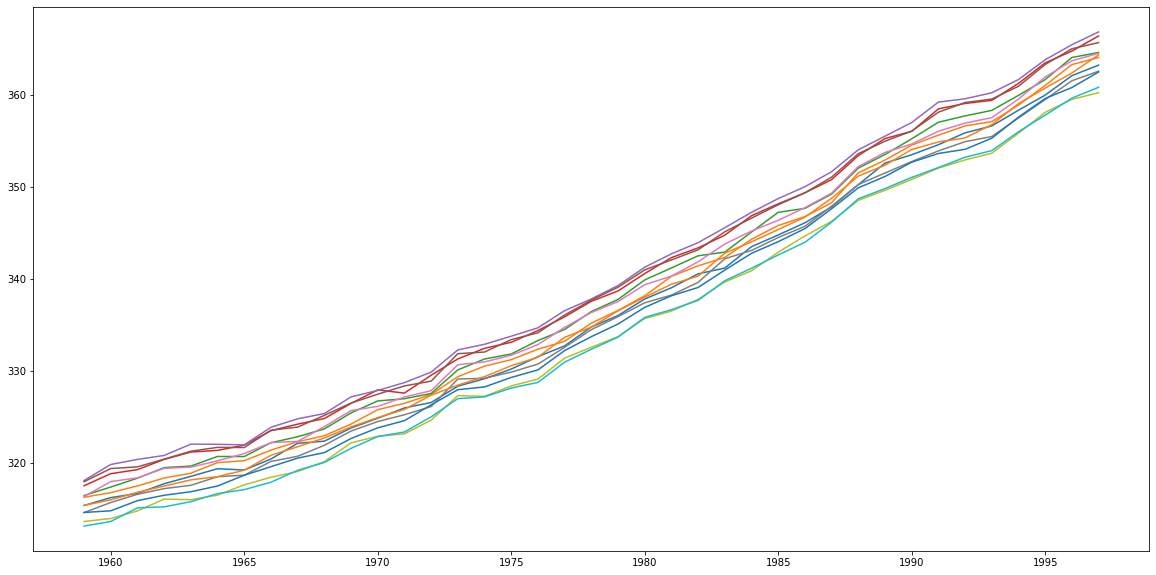

In [6]:
plt.figure(figsize=(20,10))
for i in range(1, co2.shape[1]):
    sns.lineplot(x=co2[:,0], y=co2[:,i])

In [7]:
co2_df = pd.read_fwf('C:\\Users\\brije\\Downloads\\CO2_R.txt', sep=" ")

In [8]:
co2_df.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec']

In [9]:
co2m= co2_df.melt('Year',var_name="Months",value_name="conc")

In [10]:
co2m

,Year,Months,conc
0,1959,Jan,315.42
1,1960,Jan,316.27
2,1961,Jan,316.73
3,1962,Jan,317.78
4,1963,Jan,318.58
...,...,...,...
463,1993,Dec,356.78
464,1994,Dec,359.05
465,1995,Dec,360.74
466,1996,Dec,362.38


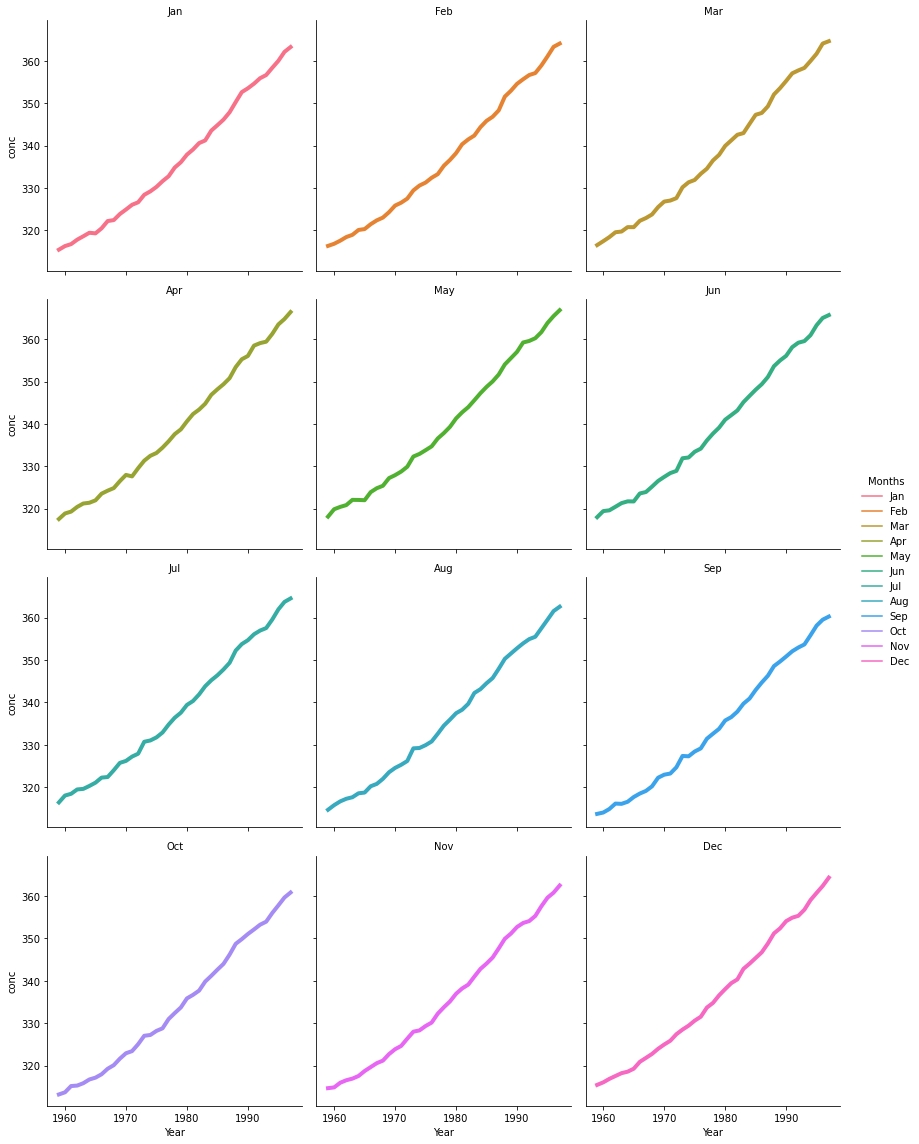

In [11]:
g = sns.relplot(kind='line', data=co2m, x='Year', y='conc', col='Months',col_wrap=3,hue='Months',linewidth=4, zorder=5,height=4, aspect=1)
g.map(sns.lineplot)
g.set_titles('{col_name}')
g.tight_layout()

### Plot monthly variation of CO2 for the year 1972

In [12]:
year_1972 = co2m.loc[co2m['Year'] == 1972]

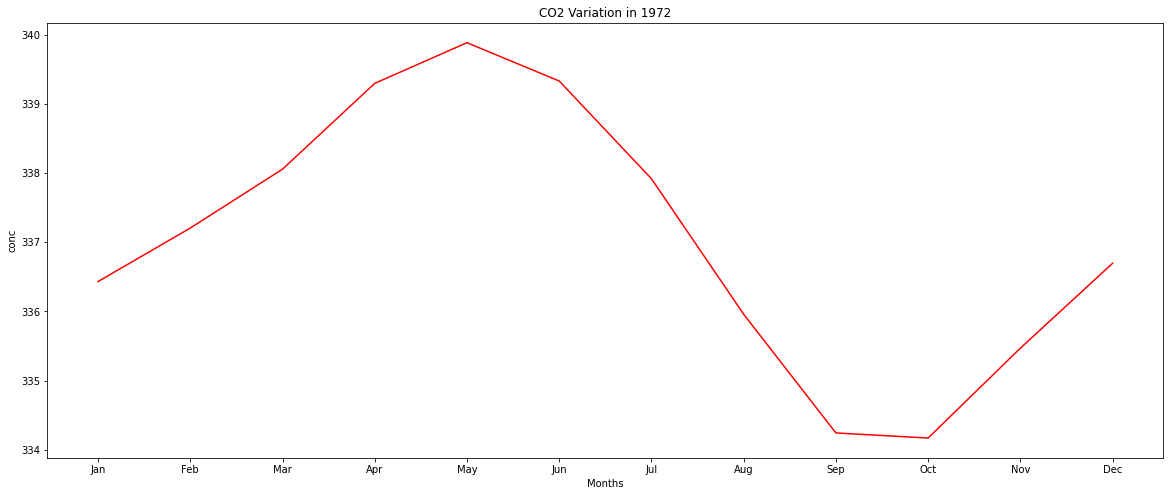

In [13]:
fig = plt.figure(figsize=(20,8))
g = sns.lineplot(data = co2m,x='Months',y='conc',ci=None,color = 'r')
g.set_title('CO2 Variation in 1972')
plt.show()

### Plot the variation of mean CO2 concentration with year

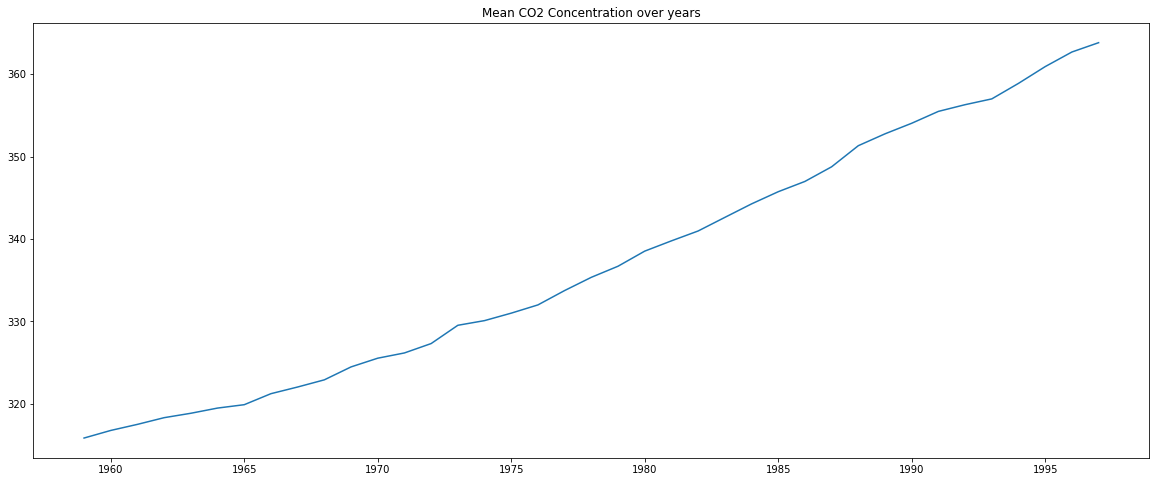

In [14]:
fig = plt.figure(figsize=(20,8))
plt.plot(co2m.groupby('Year').mean())
plt.title('Mean CO2 Concentration over years')
plt.show()

### Plot the overall variation of CO2

In [15]:
co2m['date'] = pd.to_datetime([f'{y}-{m}-01' for y, m in zip(co2m.Year, co2m.Months)])

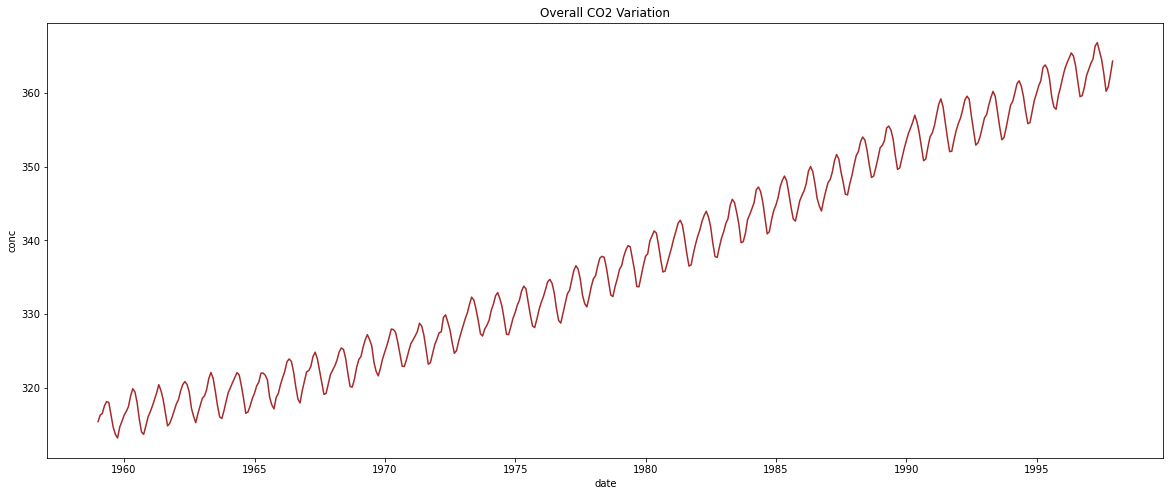

In [16]:
fig = plt.figure(figsize=(20,8))
sns.lineplot(x=co2m.date,y=co2m.conc,color='brown')
plt.title('Overall CO2 Variation')
plt.show()